In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def convert_3sat_to_vertex_cover(clauses):
    num_clauses = len(clauses)
    variables = set(abs(lit) for clause in clauses for lit in clause)
    num_vars = len(variables)

    # Calculate the number of vertices and required vertex cover size
    k = 2 * num_vars + 3 * num_clauses
    K = num_vars + 2 * num_clauses

    # Initialize the adjacency matrix for the graph with k vertices
    graph = [[0] * k for _ in range(k)]

    # Step 1: Create 2 vertices for each variable (x and ¬x) and connect them
    var_offset = 0
    for var in range(1, num_vars + 1):
        graph[var_offset][var_offset + 1] = 1
        graph[var_offset + 1][var_offset] = 1
        var_offset += 2

    # Step 2: Create 3 vertices for each clause and connect them in a triangle
    clause_offset = 2 * num_vars
    for clause in clauses:
        graph[clause_offset][clause_offset + 1] = 1
        graph[clause_offset + 1][clause_offset] = 1
        graph[clause_offset][clause_offset + 2] = 1
        graph[clause_offset + 2][clause_offset] = 1
        graph[clause_offset + 1][clause_offset + 2] = 1
        graph[clause_offset + 2][clause_offset + 1] = 1
        clause_offset += 3

    # Step 3: Connect clause vertices to corresponding literal vertices
    clause_offset = 2 * num_vars
    for clause in clauses:
        for i, literal in enumerate(clause):
            literal_index = (abs(literal) - 1) * 2  # Literal vertex index
            if literal < 0:
                literal_index += 1  # Use negated vertex if literal is negative
            graph[clause_offset + i][literal_index] = 1
            graph[literal_index][clause_offset + i] = 1
        clause_offset += 3

    return k, K, graph

def visualize_graph(adjacency_matrix):
    """
    Visualize a graph from an adjacency matrix.

    Parameters:
    adjacency_matrix (list of lists or numpy array): The k×k adjacency matrix representing the graph.
    """
    # สร้างกราฟ
    G = nx.Graph()
    
    # เพิ่มจุดยอด (Nodes)
    n = len(adjacency_matrix)
    G.add_nodes_from(range(n))
    
    # เพิ่มเส้นเชื่อม (Edges) จาก adjacency matrix
    for i in range(n):
        for j in range(i+1, n):  # ใช้ i+1 เพื่อหลีกเลี่ยงการเพิ่ม edge ซ้ำใน undirected graph
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)
    
    # วาดกราฟ
    pos = nx.spring_layout(G)  # ใช้ layout แบบ spring สำหรับจัดตำแหน่ง
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels={(i, j): '' for i, j in G.edges()}, font_color='red'
    )
    plt.title("Graph Visualization")
    plt.show()

def run_test(clauses):
    # Convert 3-SAT to Vertex Cover and print the result
    k_vertices, Kv_vertex_cover, adjacency_matrix = convert_3sat_to_vertex_cover(clauses)

    print(k_vertices)  # Total number of vertices
    print(Kv_vertex_cover)  # Required size of vertex cover set
    for row in adjacency_matrix:
        print(" ".join(map(str, row)))
    visualize_graph(adjacency_matrix)
    


9
5
0 1 0 0 0 0 1 0 0
1 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0
0 0 1 0 0 0 0 1 0
0 0 0 0 0 1 0 0 1
0 0 0 0 1 0 0 0 0
1 0 0 0 0 0 0 1 1
0 0 0 1 0 0 1 0 1
0 0 0 0 1 0 1 1 0


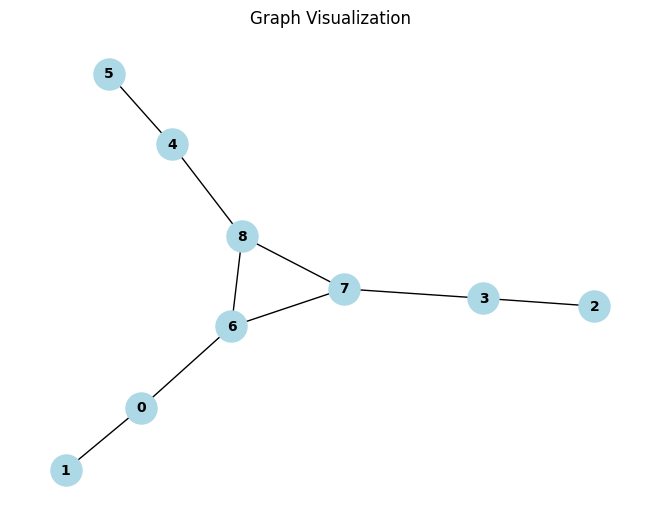

In [17]:
# Hardcoded input (3-SAT clauses)
clauses = [
    [1, -2, 3]
]

run_test(clauses)  

12
7
0 1 0 0 0 0 1 0 0 1 0 0
1 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 1 0 0 1 0
0 0 0 0 0 1 0 0 1 0 0 0
0 0 0 0 1 0 0 0 0 0 0 1
1 0 0 0 0 0 0 1 1 0 0 0
0 0 0 1 0 0 1 0 1 0 0 0
0 0 0 0 1 0 1 1 0 0 0 0
1 0 0 0 0 0 0 0 0 0 1 1
0 0 0 1 0 0 0 0 0 1 0 1
0 0 0 0 0 1 0 0 0 1 1 0


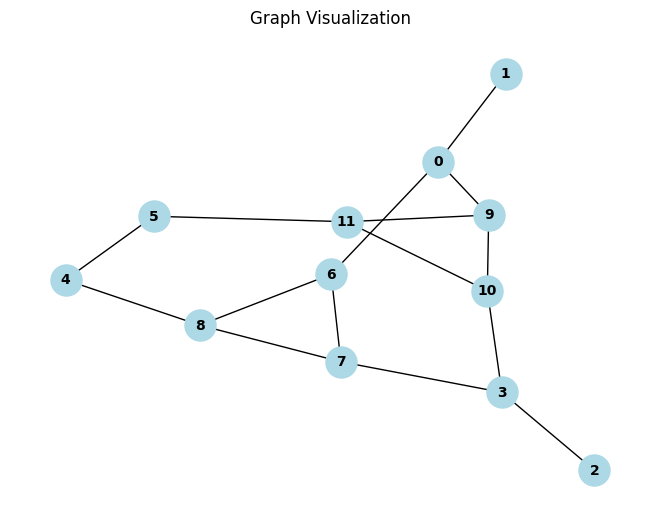

In [18]:
# 3.1
'''
2
1 -2 3
1 -2 -3
'''

clauses = [
    [1, -2, 3],
    [1, -2, -3]
]

run_test(clauses)


17
10
0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0


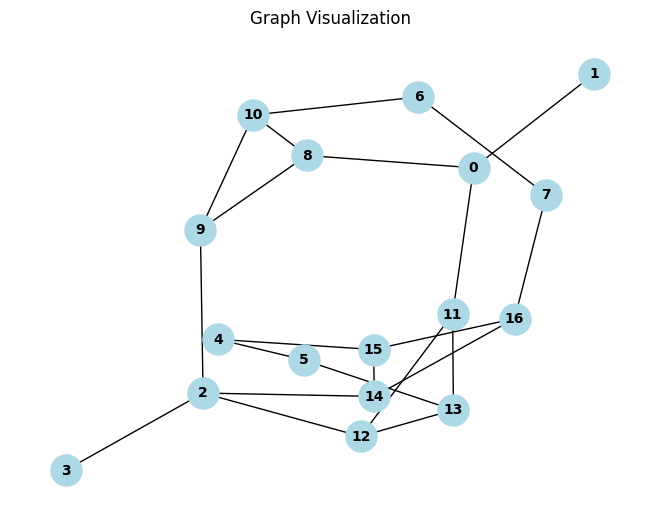

In [19]:
# 3.2
'''
3
1 2 4
1 2 -3
2 3 -4
'''

clauses = [
    [1, 2, 4],
    [1, 2, -3],
    [2, 3, -4]
]

run_test(clauses)

26
15
0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
0 0 0 

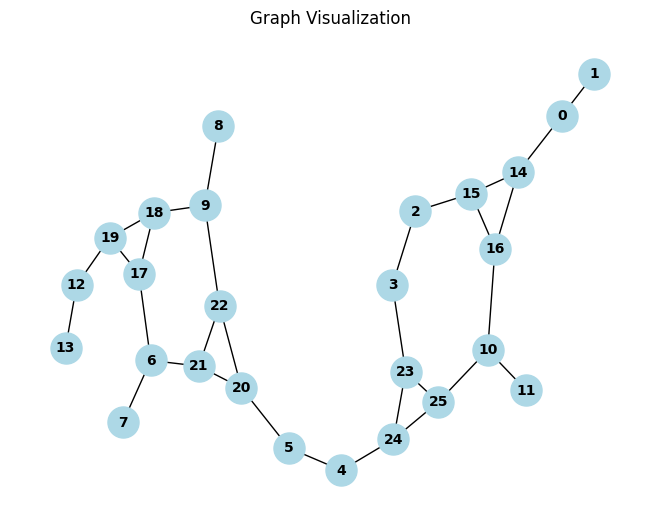

In [20]:
# 3.3
'''
4
1 2 6
4 -5 7
-3 4 -5
-2 3 6
'''

clauses = [
    [1, 2, 6],
    [4, -5, 7],
    [-3, 4, -5],
    [-2, 3, 6]
]

run_test(clauses)